In [ ]:
# CNN models for image classification
# 1. ResNet
# 2. InceptionNet/GoogLeNet (inception v4)
# 3. MobileNet

# RNN models for text classification
# 1. Logistic Regression
# 2. RNN
# 3. LSTM
# 4. BERT (optional)

In [ ]:
!git clone https://github.com/cyberspace-power/cs6313_yt_vid_classification.git

Cloning into 'cs6313_yt_vid_classification'...
remote: Enumerating objects: 15489, done.
remote: Counting objects: 100% (3821/3821), done.
remote: Compressing objects: 100% (3819/3819), done.
remote: Total 15489 (delta 4), reused 3814 (delta 1), pack-reused 11668
Receiving objects: 100% (15489/15489), 1.19 GiB | 24.03 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Checking out files: 100% (15446/15446), done.


In [ ]:
!git pull

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from keras.layers import Concatenate
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.applications import ResNet50V2

In [ ]:
# from tqdm import tqdm
# image_filepath = 'cs6313_yt_vid_classification/dataset/category_wise_thumbnails/'

# def read_image_data(categories = ['1', '2', '10', '17']):

#     image_data = []
#     label_data = []
#     title_data = []

#     # with open('/content/drive/MyDrive/category_wise_thumbnails/17') as filepath:
#     for x in categories:
#       for img in tqdm(os.listdir(image_filepath+'category_'+x), desc = "loading"):

#         image_path = os.path.join(image_filepath+'category_'+x+'/', img)

#         # loading the image from the path and then converting them into
#         # grayscale for easier covnet prob
#         thumbnail = cv2.imread(image_path)
#         # thumbnail=cv2.resize(thumbnail, (224, 224, 3),interpolation = cv2.INTER_AREA)
#         thumbnail = np.array(thumbnail)
#         thumbnail = thumbnail.astype('float32')
#         thumbnail /= 255

#         # final step-forming the training data list with numpy array of the images
#         image_data.append(np.array(thumbnail))
#         label_data.append(int(x))
#         title_data.append(img)
    
#     df = pd.DataFrame({'Image':image_data, 'Category':label_data, 'Video Id':title_data})
 
#     # shuffling of the training data to preserve the random state of our data
#     # from random import shuffle
#     # shuffle(training_data)

#     df = df.sample(frac=1).reset_index(drop=True)
#     # print(df.head())
#     # print(df.shape)
 
#     # saving our trained data for further uses if required 
#     # np.save('train_data.npy', training_data)
#     return df

In [ ]:
from tqdm import tqdm
image_filepath = 'cs6313_yt_vid_classification/dataset/category_wise_thumbnails/'

def read_image_data(categories = ['1', '2', '10', '17']):

    # image_data = []
    label_data = []
    title_data = []

    for x in categories:
      for img in tqdm(os.listdir(image_filepath+'category_'+x), desc = "loading"):

        image_path = os.path.join(image_filepath+'category_'+x+'/', img)
        label_data.append(x)
        title_data.append('category_'+x+'/'+img)
    
    df = pd.DataFrame({'Video Id':title_data, 'Category':label_data})
    df = df.sample(frac=1).reset_index(drop=True)
    return df

In [ ]:
image_df = read_image_data()
image_df

loading: 100%|██████████| 3797/3797 [00:00<00:00, 437617.40it/s]


,Video Id,Category
0,category_1/byXx0G8SbaI.jpg,1
1,category_1/YwOys7qEhGU.jpg,1
2,category_17/nP5S-sCN4cQ.jpg,17
3,category_17/ZaBJrgD0rlw.jpg,17
4,category_10/woYAVroa_yc.jpg,10
...,...,...
15183,category_17/TsvgRI6fuOw.jpg,17
15184,category_2/CAGNBxuCU7U.jpg,2
15185,category_2/FR5ebakzAHw.jpg,2
15186,category_1/KvLzkmLrFOs.jpg,1


In [ ]:
!ls cs6313_yt_vid_classification/dataset/category_wise_thumbnails/

category_1  category_10  category_17  category_2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

img_iter = img_gen.flow_from_dataframe(
    image_df,
    shuffle=True,
    directory='cs6313_yt_vid_classification/dataset/category_wise_thumbnails/',
    x_col='Video Id',
    y_col='Category',
    class_mode='sparse',
    #target_size=(360, 240),
    target_size=(480, 360),
    batch_size=32,
    subset='training'
)

img_iter_val = img_gen.flow_from_dataframe(
    image_df,
    shuffle=True,
    directory='cs6313_yt_vid_classification/dataset/category_wise_thumbnails/',
    x_col='Video Id',
    y_col='Category',
    class_mode='sparse',
    #target_size=(360, 240),
    target_size=(480, 360),
    batch_size=32,
    subset='validation'
)

Found 12151 validated image filenames belonging to 4 classes.
Found 3037 validated image filenames belonging to 4 classes.


CNN model

In [ ]:
# CNN base model
# base_model = tf.keras.applications.ResNet50(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(480, 360, 3),
#     pooling='avg',
#     classes=4
# )

# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(224, 224, 3),
#     alpha=1.0,
#     include_top=False,
#     weights="imagenet",
#     pooling='avg',
#     classes=4
# )

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(480, 360, 3),
    pooling='avg',
    classes=4
)

# base_model = tf.keras.applications.Xception(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
# base_model.trainable = False

# x = Flatten()(base_model.output)
# x = Dense(1024, activation="relu")(x)
# x = Dropout(0.2)(x)
# x = Dense(4, activation="softmax")(x)
# model = tf.keras.models.Model(base_model.input, x)
# model.compile(optimizer=Adam(learning_rate=0.00001),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

base_model.trainable = False

# resnetv2_base = tf.keras.applications.ResNet50V2(
#     include_top=False,
#     weights="imagenet",
#     pooling='avg'
# )

# Add a classifier
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(4, activation='softmax')(x) # change 2 to total number of classes
cnn_model = tf.keras.models.Model(base_model.input, x)
# Adam(lr=1e-3, decay=1e-3 / 200)
cnn_model.compile(optimizer=Adam(learning_rate=1e-4, decay=0.001),
    loss='sparse_categorical_crossentropy',  # change to categorical with shape[0,0,...1,0,0..] with length as the total number of thumbnail categories
    metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("xception_1e-5_480x360.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')

hist = cnn_model.fit(img_iter, validation_data=img_iter_val, epochs=25, batch_size=32, callbacks=[checkpoint, early])

# checkpoint = ModelCheckpoint("xception.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
# hist = model.fit(img_iter, validation_data=img_iter_val, epochs=25, batch_size=32, callbacks=[checkpoint, early])

Epoch 1/25
380/380 [==============================] - ETA: 0s - loss: 0.7876 - accuracy: 0.7117
Epoch 1: val_accuracy improved from -inf to 0.74020, saving model to xception_1e-5_480x360.h5
380/380 [==============================] - 465s 1s/step - loss: 0.7876 - accuracy: 0.7117 - val_loss: 0.7084 - val_accuracy: 0.7402
Epoch 2/25
380/380 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.7493
Epoch 2: val_accuracy improved from 0.74020 to 0.74350, saving model to xception_1e-5_480x360.h5
380/380 [==============================] - 465s 1s/step - loss: 0.6813 - accuracy: 0.7493 - val_loss: 0.6981 - val_accuracy: 0.7435
Epoch 3/25
380/380 [==============================] - ETA: 0s - loss: 0.6515 - accuracy: 0.7591
Epoch 3: val_accuracy improved from 0.74350 to 0.74877, saving model to xception_1e-5_480x360.h5
380/380 [==============================] - 465s 1s/step - loss: 0.6515 - accuracy: 0.7591 - val_loss: 0.6902 - val_accuracy: 0.7488
Epoch 4/25
380/380 [========

In [ ]:
cnn_model.summary()

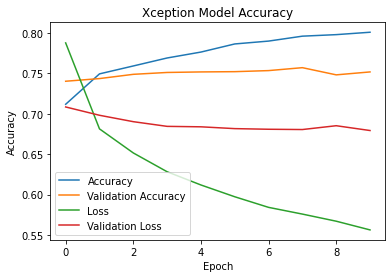

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Xception Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()
plt.savefig('xception480x360_acc.png')

In [ ]:
from keras.models import load_model
saved_model = load_model("resnet50.h5")
test_x = []
original_y = []
parsed_dataset = read_dataset('/content/train0133_processed.tfrecord') # ACTION NEEDED: .tfrecord file_path needs to be specified
labeled_data_sets = labeled_dataset(parsed_dataset)
for data in labeled_data_sets[:800]:
  if data[1] == 12:
    val = 0
  elif data[1] == 11:
    val = 1
  elif data[1] == 17:
    val = 2
  else:
    val = 3
  resized_image = cv2.resize(data[0], (224, 224)) / 255.0
  test_x.append(resized_image)
  original_y.append(val)
test_y = np.array(original_y).T
test_x = np.array(test_x)
test_y = to_categorical(test_y)
loss, acc = saved_model.evaluate(test_x, test_y)
print(loss)
print(acc)

In [ ]:
predict_y = saved_model.predict(test_x)
predict_y = np.argmax(predict_y, axis=1)
original_y = np.array(original_y)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
precision = precision_score(original_y, predict_y, average='macro')
recall = recall_score(original_y, predict_y, average='macro')
f1 = f1_score(original_y, predict_y, average='macro')
cm = confusion_matrix(original_y, predict_y)
print(f'Precision score is: {precision}')
print(f'Recall score is: {recall}')
print(f'F1 score is: {f1}')
print(cm)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(cm, ['Arts', 'Games', 'Vehicles', 'Other'], title='ResNet50 Confusion Matrix')